In [99]:
from pyslise import Pyslise2D

def V(x, y):
    return (1+x**2) * (1+y**2)

In [100]:
def eigenvalues_2d(ymax, n=18):
    p = Pyslise2D(V, -5.5, 5.5, -5.5, ymax, tolerance=1e-9, x_symmetric=True)
    es = []
    j = 0
    for i, e, m in p.eigenvaluesByIndex(0, n):
        if i != j:
            print(f"Wrong index: {i} != {j}, {ymax}")
            while j < i:
                es += [-1]
                j += 1
        es += [e]*m
        j += m
    return es

In [101]:
Es = eigenvalues_2d(5.5)

In [114]:
from p_tqdm import p_map
import numpy as np

n = 109
ymaxs = np.linspace(-2.99, 4.5, n)
result = list(p_map(eigenvalues_2d, ymaxs))

Wrong index: 9 != 8, -1.8110185185185186
Wrong index: 11 != 10, -1.8110185185185186
Wrong index: 14 != 13, -1.3949074074074075
Wrong index: 12 != 11, -1.2562037037037037
Wrong index: 2 != 1, -0.5626851851851851
Wrong index: 10 != 9, -0.8400925925925926
Wrong index: 13 != 12, 0.7550000000000003
Wrong index: 17 != 16, 2.419444444444445
Wrong index: 18 != 17, 2.766203703703704



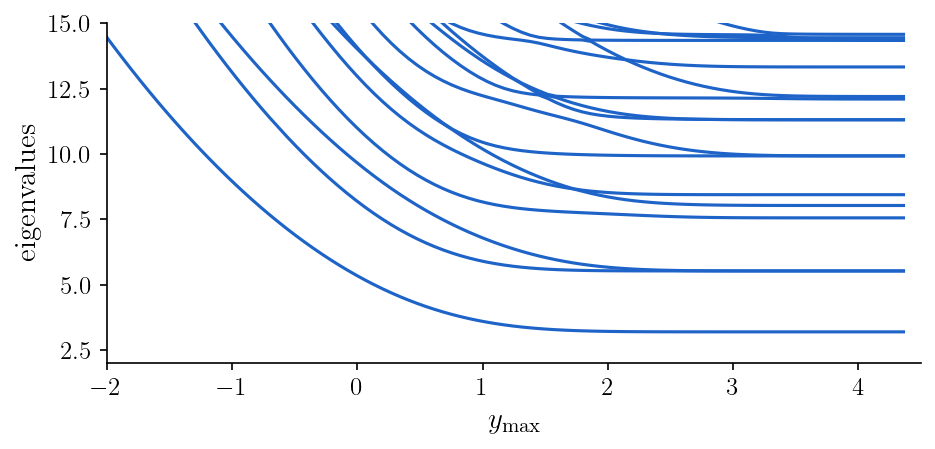

In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='serif', size=12, serif="Computer Modern Roman")
mpl.rc('text', usetex = True)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

blauw = "#1E64C8"

filtered = [
    [(result[i-1][j] + result[i+1][j])/2 if l == -1 else l for j, l in enumerate(r)] for i, r in list(enumerate(result))[1:-1]
]

fig = plt.figure(figsize=(7,3), dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(r'$y_\text{max}$', fontsize=14)
ax.set_ylabel('eigenvalues', fontsize=14)

for l in zip(*filtered):
    plt.plot(*zip(*zip(ymaxs, l)), color=blauw)
    
plt.xlim(-2, 4.5)
plt.ylim(2, 15)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.savefig("counting_eigenvalues.pdf", bbox_inches="tight")

In [116]:
E = Es[3]

def find_crossing(index, a=-2, b=5):
    fa = eigenvalues_2d(a, index+2)[index] - E
    fb = eigenvalues_2d(b, index+2)[index] - E
    
    while b - a > 1e-6:
        c = (a+b)/2
        fc = eigenvalues_2d(c, index+2)[index] - E
        if fc * fa > 0:
            a, fa = c, fc
        else:
            b, fb = c, fc
    return c


fixed_ymaxs = list(p_map(find_crossing, [0, 1, 2]))

In [117]:
fixed_ymaxs

[-0.6030529737472534, 0.252712607383728, 0.7235060930252075]

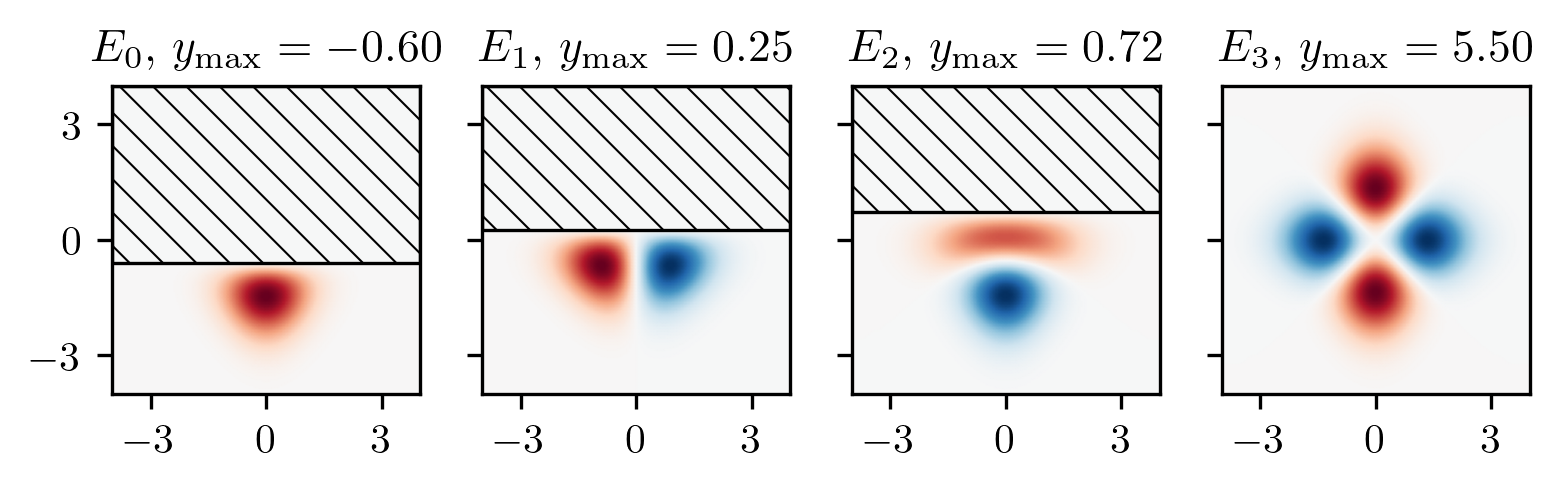

In [118]:
import matplotlib.pyplot as plt
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='serif', size=10, serif="Computer Modern Roman")
mpl.rc('text', usetex=True)
mpl.rcParams['hatch.linewidth'] = .5

blauw = "#1E64C8"

border = 4
x = np.linspace(-border, border, 211)
y = np.linspace(-border, border, 211)

cols = 4
fig, axes = plt.subplots(
    ncols=cols, figsize=(7, 3),
    dpi=300,
    sharex=True, sharey=True)
plt.subplots_adjust(right=0.8, top=1.1)

fig_index = 0
for index, ymax in enumerate(fixed_ymaxs + [5.5]):
    p = Pyslise2D(V, -5.5, 5.5, -5.5, ymax, tolerance=1e-9, x_symmetric=True)
    i, E, m = [iEm for iEm in p.eigenvaluesByIndex(0, 10) if iEm[0] == index][0]
    fs = p.eigenfunction(E)
    assert len(fs) == 1
    f = fs[0]
    
    z = f(x, y)
    vmax = np.max(np.abs(z))
    ax = axes[fig_index]
    ax.set_xticks(ticks=[-3,0,3])
    ax.set_yticks(ticks=[-3,0,3])
    ax.set_aspect(1)
    ax.set_title(f"$E_{{{i}}}$, $y_\\text{{max}} = {ymax:.2f}$", fontsize=11)
    ax.pcolormesh(x, y, z.T, shading='gouraud', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
    if ymax < 5:
        ax.fill(
            [-border, -border, border, border],
            [ymax, border, border, ymax],
            fill=False, hatch='\\\\\\', color="#000", lw=.8)
    fig_index += 1

plt.savefig("counting_eigenvalues_fixed_energy.png", bbox_inches='tight')

In [119]:
Es

[3.195918085815013,
 5.526743876183483,
 5.526743876183483,
 7.557803339529844,
 8.031272358837452,
 8.444581213425087,
 9.928061076634362,
 9.928061076634362,
 11.311817114182446,
 11.311817114182446,
 12.103253950938623,
 12.201179002193753,
 13.33233105008188,
 14.348269252631667,
 14.348269252631667,
 14.450480368206527,
 14.580555147236817,
 16.15142050639652,
 16.15142050639652]